In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats

data = pd.read_csv(r"D:\Documents\Coding\Python\Files\ipl_data.csv")

data.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [2]:
data.columns


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [3]:
print("Shape of the dataset:", data.shape)


Shape of the dataset: (577, 18)


In [4]:
data.describe()


,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,577.000000,577.000000,577.000000,577.000000,577.000000,0.0
mean,289.000000,2012.029463,0.025997,13.715771,3.363951,NaN
std,166.709828,2.486247,0.159263,23.619282,3.416049,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,145.000000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,289.000000,2012.000000,0.000000,0.000000,3.000000,NaN
75%,433.000000,2014.000000,0.000000,20.000000,6.000000,NaN
max,577.000000,2016.000000,1.000000,144.000000,10.000000,NaN


In [5]:
max_win_by_runs = data[data['win_by_runs'] == data['win_by_runs'].max()]

max_win_by_runs


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
560,561,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN


In [6]:
data.loc[0:10, ["city", "team1", "team2"]]


,city,team1,team2
0,Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore
1,Chandigarh,Chennai Super Kings,Kings XI Punjab
2,Delhi,Rajasthan Royals,Delhi Daredevils
3,Mumbai,Mumbai Indians,Royal Challengers Bangalore
4,Kolkata,Deccan Chargers,Kolkata Knight Riders
5,Jaipur,Kings XI Punjab,Rajasthan Royals
6,Hyderabad,Deccan Chargers,Delhi Daredevils
7,Chennai,Chennai Super Kings,Mumbai Indians
8,Hyderabad,Deccan Chargers,Rajasthan Royals
9,Chandigarh,Kings XI Punjab,Mumbai Indians


In [7]:
data["city"].unique()


array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', nan, 'Rajkot', 'Kanpur'], dtype=object)

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               577 non-null    int64  
 1   season           577 non-null    int64  
 2   city             570 non-null    object 
 3   date             577 non-null    object 
 4   team1            577 non-null    object 
 5   team2            577 non-null    object 
 6   toss_winner      577 non-null    object 
 7   toss_decision    577 non-null    object 
 8   result           577 non-null    object 
 9   dl_applied       577 non-null    int64  
 10  winner           574 non-null    object 
 11  win_by_runs      577 non-null    int64  
 12  win_by_wickets   577 non-null    int64  
 13  player_of_match  574 non-null    object 
 14  venue            577 non-null    object 
 15  umpire1          577 non-null    object 
 16  umpire2          577 non-null    object 
 17  umpire3         

In [9]:
grouped_by_team1_runs = data.groupby("team1")["win_by_runs"].sum()

grouped_by_team1_runs


team1
Chennai Super Kings            1594
Deccan Chargers                 421
Delhi Daredevils                441
Gujarat Lions                     1
Kings XI Punjab                 801
Kochi Tuskers Kerala             23
Kolkata Knight Riders           780
Mumbai Indians                 1362
Pune Warriors                   139
Rajasthan Royals                821
Rising Pune Supergiants           0
Royal Challengers Bangalore    1150
Sunrisers Hyderabad             381
Name: win_by_runs, dtype: int64

In [10]:
grouped_by_winner_avg_runs = data.groupby("winner")["win_by_runs"].mean()

grouped_by_winner_avg_runs


winner
Chennai Super Kings            20.088608
Deccan Chargers                14.517241
Delhi Daredevils                7.428571
Gujarat Lions                   0.111111
Kings XI Punjab                12.634921
Kochi Tuskers Kerala            3.833333
Kolkata Knight Riders          11.735294
Mumbai Indians                 17.025000
Pune Warriors                  11.583333
Rajasthan Royals               13.031746
Rising Pune Supergiants        10.600000
Royal Challengers Bangalore    16.428571
Sunrisers Hyderabad            10.205882
Name: win_by_runs, dtype: float64

In [11]:
grouped_by_venue_matches = data.groupby("venue").size()

sorted_grouped_by_venue_matches = grouped_by_venue_matches.sort_values()

sorted_grouped_by_venue_matches


venue
Holkar Cricket Stadium                                   2
Green Park                                               2
OUTsurance Oval                                          2
De Beers Diamond Oval                                    3
Buffalo Park                                             3
Vidarbha Cricket Association Stadium, Jamtha             3
Saurashtra Cricket Association Stadium                   5
Nehru Stadium                                            5
Sharjah Cricket Stadium                                  6
Shaheed Veer Narayan Singh International Stadium         6
Sheikh Zayed Stadium                                     7
Newlands                                                 7
Barabati Stadium                                         7
JSCA International Stadium Complex                       7
Dubai International Cricket Stadium                      7
Punjab Cricket Association IS Bindra Stadium, Mohali     7
St George's Park                                  

In [12]:
data.groupby("venue").count()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,umpire1,umpire2,umpire3
venue,,,,,,,,,,,,,,,,,
Barabati Stadium,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0
Brabourne Stadium,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,0
Buffalo Park,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
De Beers Diamond Oval,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
Dr DY Patil Sports Academy,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,0
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,0
Dubai International Cricket Stadium,7,7,0,7,7,7,7,7,7,7,7,7,7,7,7,7,0
Eden Gardens,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,0
Feroz Shah Kotla,53,53,53,53,53,53,53,53,53,53,52,53,53,52,53,53,0


In [13]:
data.isnull().sum()


id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            577
dtype: int64

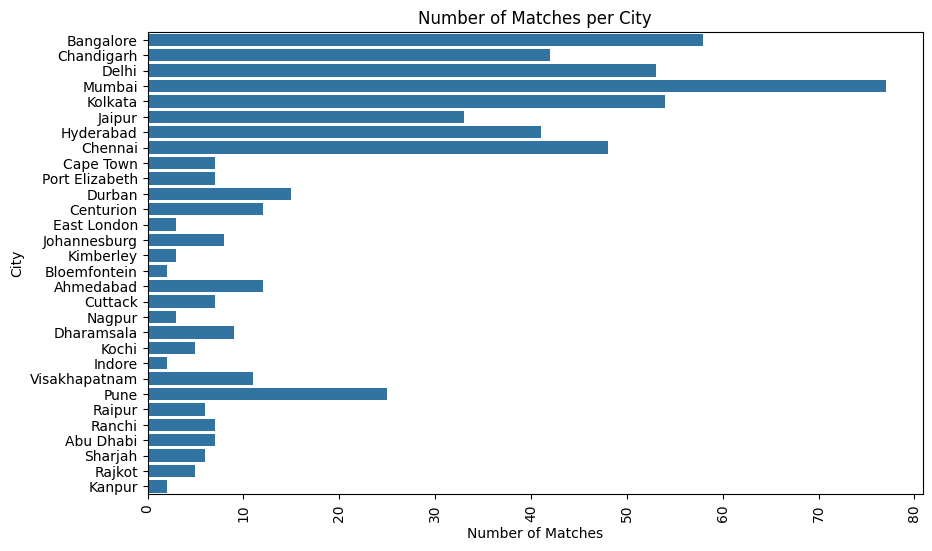

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data['city'])
plt.title('Number of Matches per City')
plt.xlabel('Number of Matches')
plt.ylabel('City')
plt.xticks(rotation=90)
plt.show()


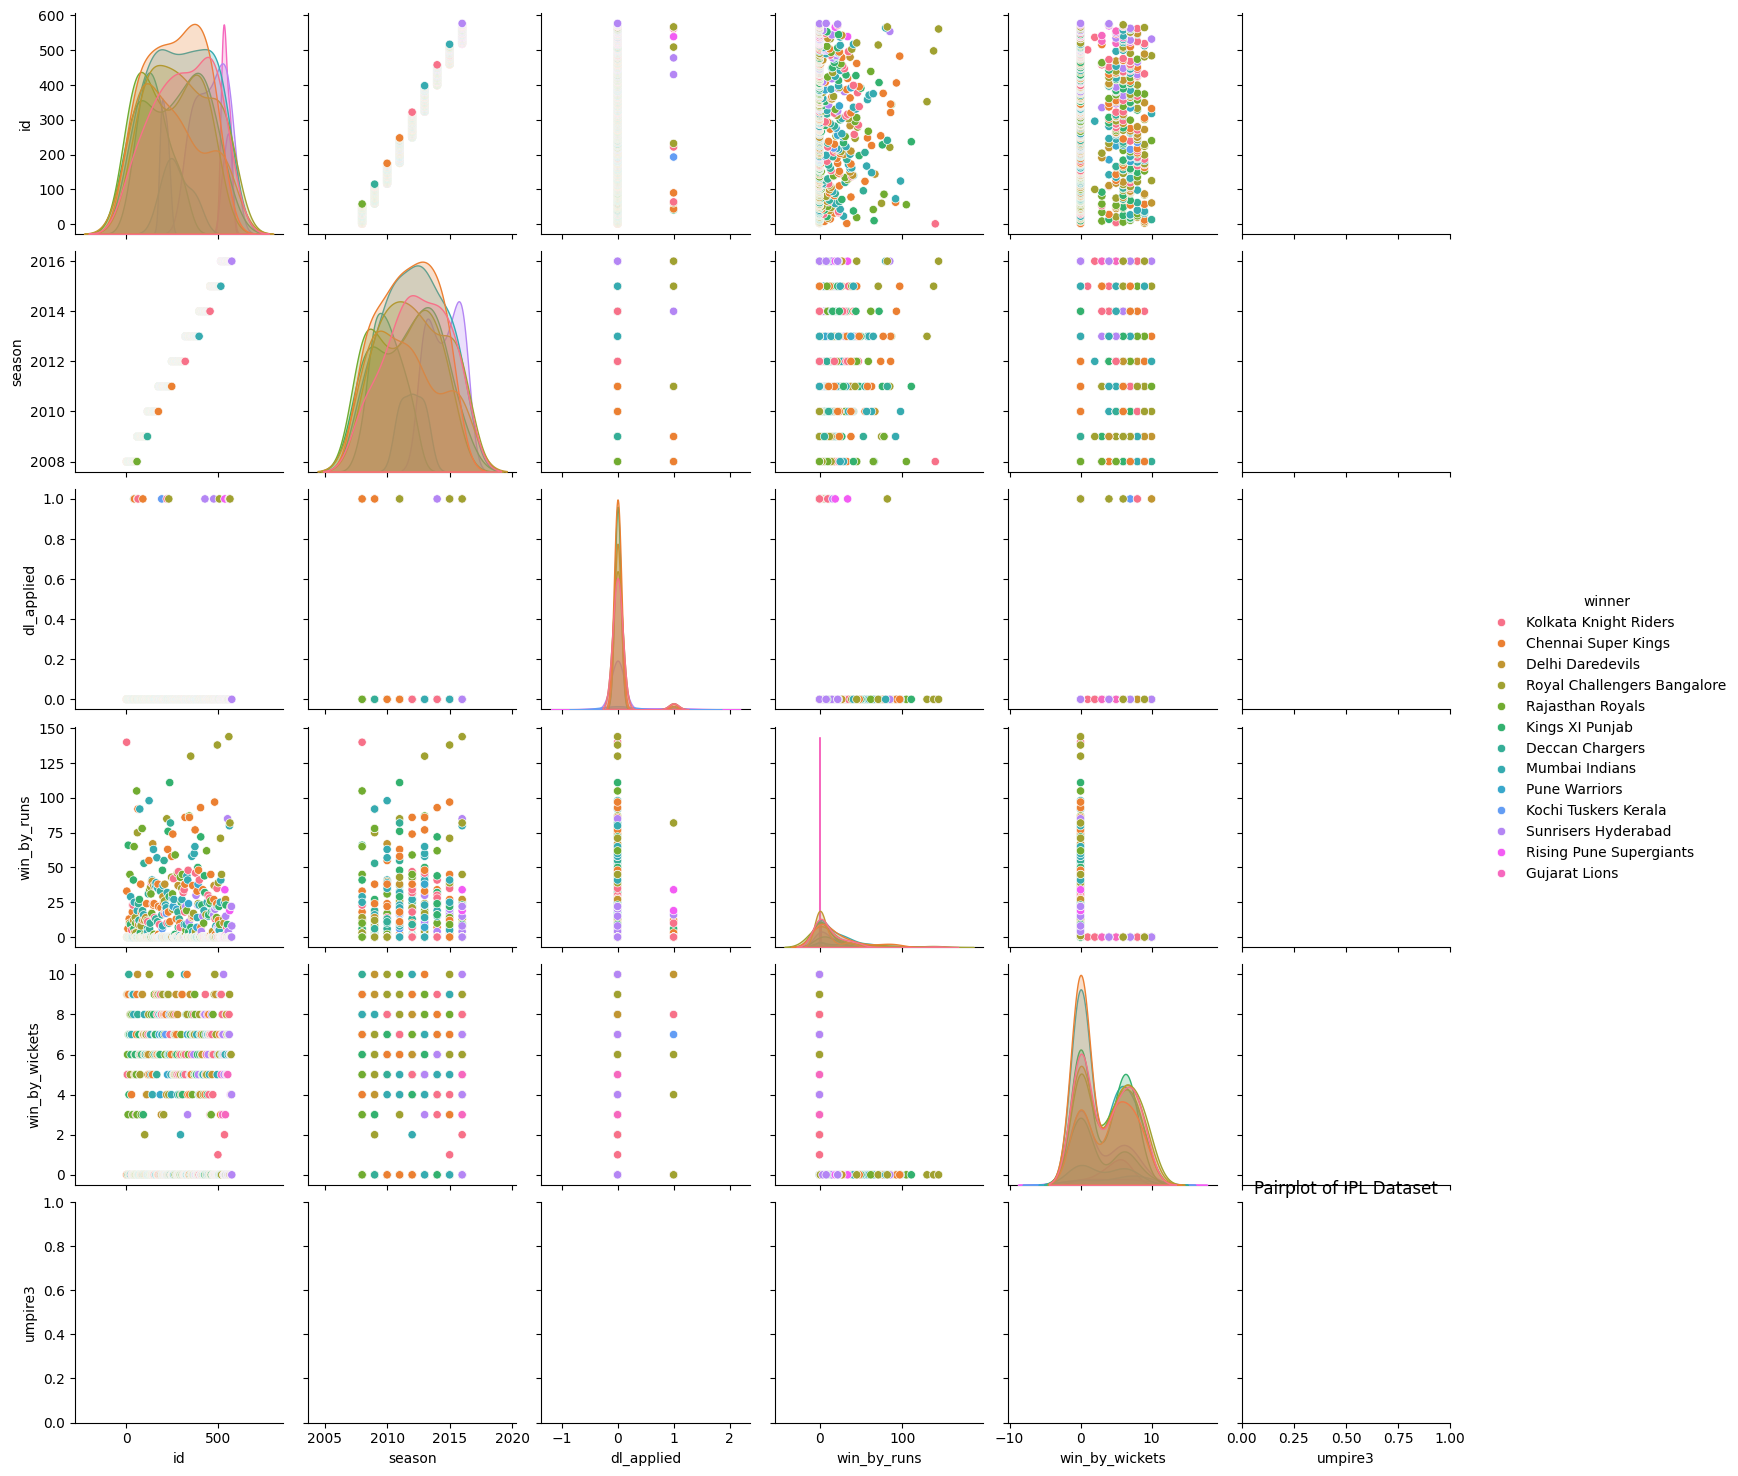

In [22]:
sns.pairplot(data, hue='winner')
plt.title('Pairplot of IPL Dataset')
plt.show()


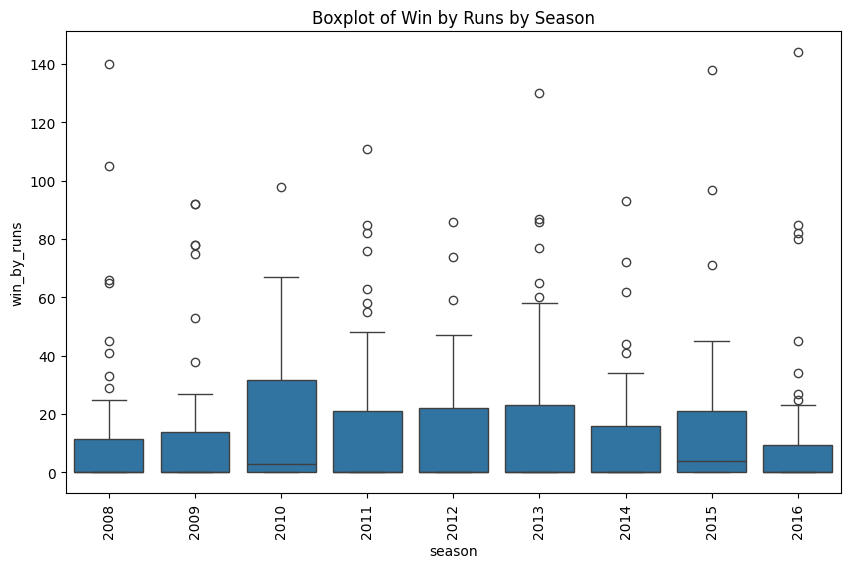

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='win_by_runs', data=data)
plt.title('Boxplot of Win by Runs by Season')
plt.xticks(rotation=90)
plt.show()


                      id    season  win_by_runs  win_by_wickets
id              1.000000  0.992806    -0.014813       -0.012804
season          0.992806  1.000000    -0.018098       -0.005966
win_by_runs    -0.014813 -0.018098     1.000000       -0.572839
win_by_wickets -0.012804 -0.005966    -0.572839        1.000000


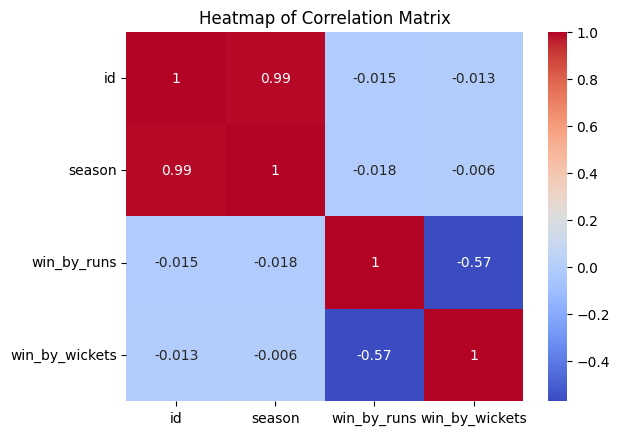

In [26]:
# Heatmap to visualize correlation matrix
corr_data = data[['id', 'season', 'win_by_runs', 'win_by_wickets']].corr()
print(corr_data)
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


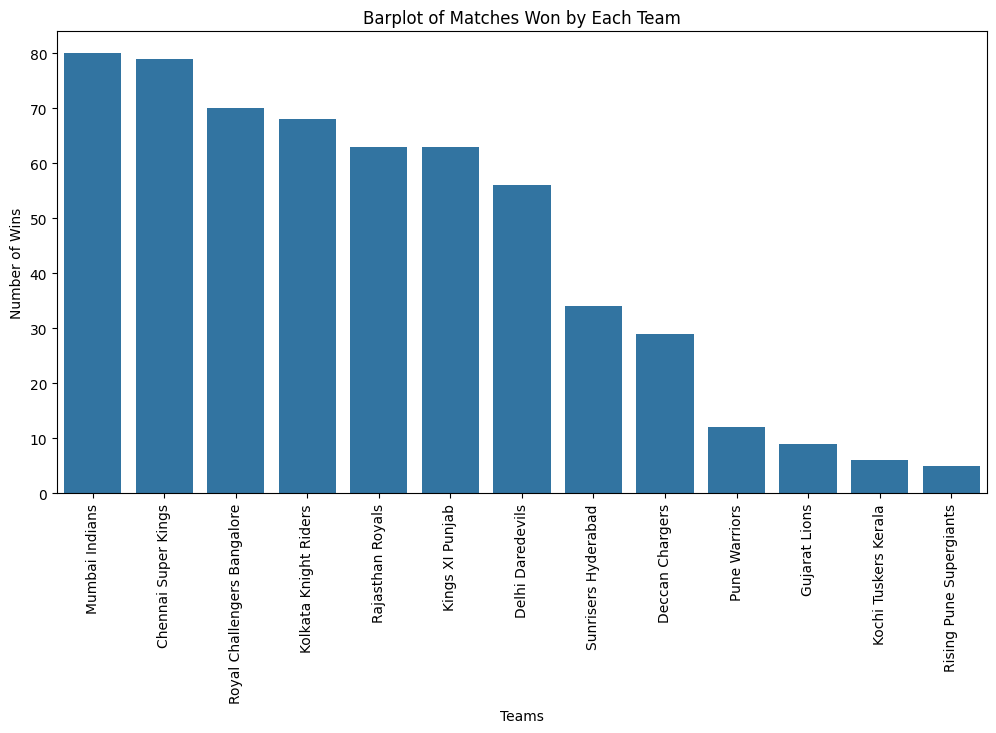

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x=data['winner'].value_counts().index, y=data['winner'].value_counts().values)
plt.title('Barplot of Matches Won by Each Team')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()


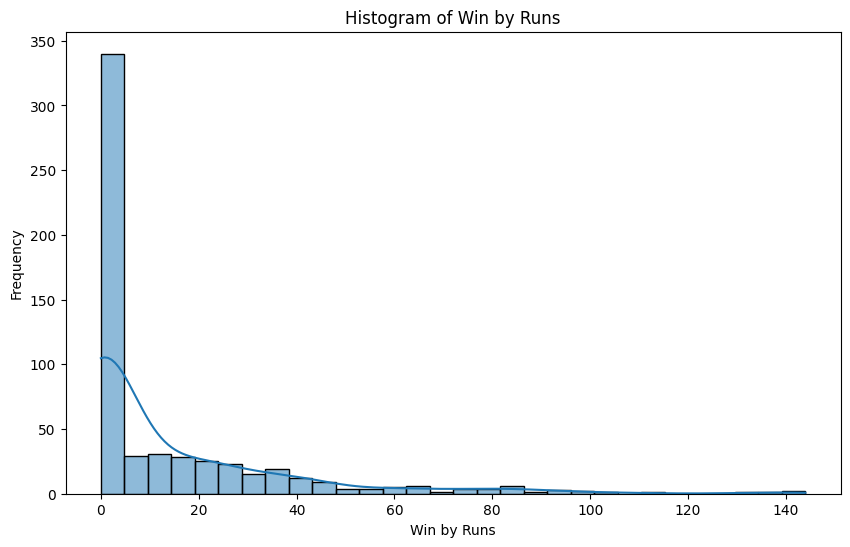

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data['win_by_runs'], bins=30, kde=True)
plt.title('Histogram of Win by Runs')
plt.xlabel('Win by Runs')
plt.ylabel('Frequency')
plt.show()


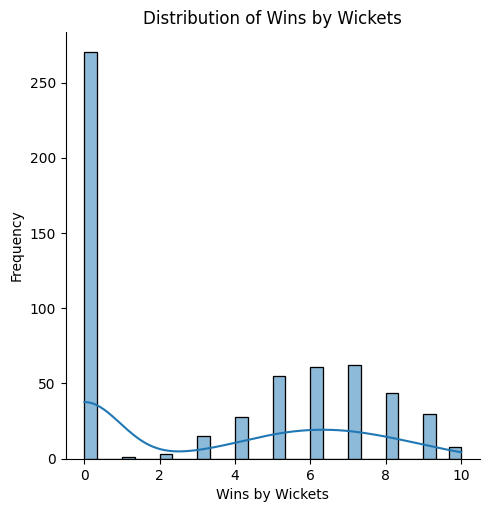

In [33]:
sns.displot(data['win_by_wickets'], bins=30, kde=True)
plt.title('Distribution of Wins by Wickets')
plt.xlabel('Wins by Wickets')
plt.ylabel('Frequency')
plt.show()


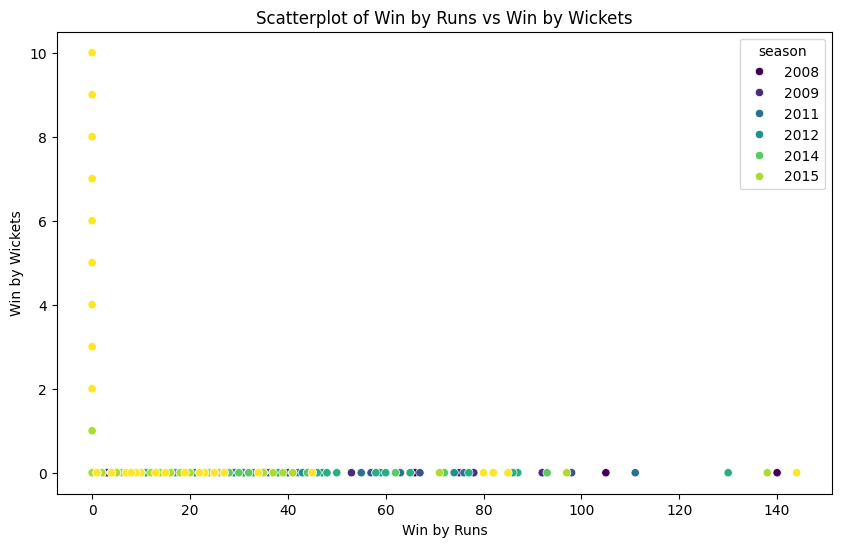

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='win_by_runs', y='win_by_wickets', data=data, hue='season', palette='viridis')
plt.title('Scatterplot of Win by Runs vs Win by Wickets')
plt.xlabel('Win by Runs')
plt.ylabel('Win by Wickets')
plt.show()
